# Visualize x-ray data, try using datasets to load rather than pytorch.datasets

In [1]:
import datahelper
# import datasets
import importlib
importlib.reload(datahelper)

/home/nashir/miniconda3/envs/cap5516-final/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'datahelper' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/datahelper.py'>

In [2]:
train_dl, test_dl = datahelper.load_xray()

Found cached dataset chest-xray-classification (/home/nashir/.cache/huggingface/datasets/keremberke___chest-xray-classification/full/1.0.0/34d5a3d96ebfc454a409411badbd8596202f787803c69e0ba42791bbd6a12c28)
100%|██████████| 3/3 [00:00<00:00, 188.66it/s]


Batch size: 128
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


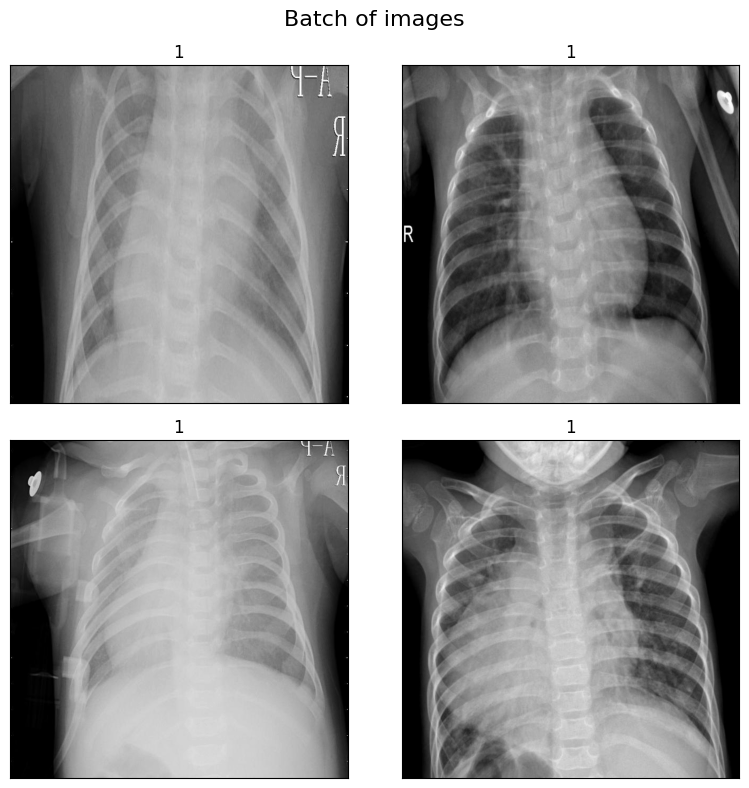

In [3]:
# Visualize some images
import matplotlib.pyplot as plt

def show_batch(dl):
    for batch in dl:
        batch_size = batch["pixel_values"].shape[0]
        print(f"Batch size: {batch_size}")
        images = batch["pixel_values"]
        labels = batch["labels"]

        fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
        fig.suptitle("Batch of images", fontsize=16)

        print(ax)
        # Create a 4x1 grid of images
        for row in range(2):
            for col in range(2):
                ax[row, col].set_xticks([])
                ax[row, col].set_yticks([])
                ax[row, col].imshow(images[row*2 + col].permute(1,2,0), cmap="gray")
                ax[row, col].set_title(labels[row*2 + col].item())
        plt.tight_layout()
        plt.show()
        break

show_batch(train_dl)